In [1]:
# First cell - Import libraries and setup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import string
import nltk
import re
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import plotly.express as px

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Second cell - Load Data
# COVID-19 Data
covid_df3 = pd.read_csv('/kaggle/input/covid19-twitter-dataset/Covid-19 Twitter Dataset (Apr-Jun 2021).csv')

# Combine COVID datasets
covid_df = pd.concat([covid_df3], ignore_index=True)

# Monkeypox Data
# Original monkeypox dataset
mpox_files = glob.glob('/kaggle/input/monkeypox-tweets/*.csv')
mpox_df1 = pd.concat(map(pd.read_csv, mpox_files), ignore_index=True)

# New monkeypox dataset
mpox_df2 = pd.read_csv('/kaggle/input/tweets-on-monkeypox/monkeypox.csv')

# New monkeypox dataset
mpox_df3 = pd.read_csv('/kaggle/input/monkeypox-tweets-data/monkeypox_tweets.csv')

# Combine monkeypox datasets
mpox_df = pd.concat([mpox_df1, mpox_df2, mpox_df3], ignore_index=True)

print("COVID-19 Dataset Shape:", covid_df.shape)
print("Monkeypox Dataset Shape:", mpox_df.shape)

COVID-19 Dataset Shape: (147475, 17)
Monkeypox Dataset Shape: (106638, 40)


In [3]:
import pandas as pd
import glob

# Monkeypox Data
# Original monkeypox dataset - Add prefix to column names for each file
mpox_files = glob.glob('/kaggle/input/monkeypox-tweets/*.csv')
mpox_dfs = []
for idx, file in enumerate(mpox_files):
    df = pd.read_csv(file)
    df.columns = [f"file{idx}_{col}" for col in df.columns]  # Add dynamic 'fileX_' prefix
    mpox_dfs.append(df)
mpox_df1 = pd.concat(mpox_dfs, ignore_index=True)

# New monkeypox datasets - Add dynamic prefixes
mpox_df2 = pd.read_csv('/kaggle/input/tweets-on-monkeypox/monkeypox.csv')
mpox_df2.columns = [f"file{len(mpox_files)}_{col}" for col in mpox_df2.columns]  # Add 'fileX_' prefix

mpox_df3 = pd.read_csv('/kaggle/input/monkeypox-tweets-data/monkeypox_tweets.csv')
mpox_df3.columns = [f"file{len(mpox_files)+1}_{col}" for col in mpox_df3.columns]  # Add 'fileX_' prefix

# Combine monkeypox datasets
mpox_df = pd.concat([mpox_df1, mpox_df2, mpox_df3], ignore_index=True)

# Print dataset shapes and sample of column names to verify

print("Monkeypox Dataset Shape:", mpox_df.shape)
print("\nMpox DataFrame Columns:")
print(mpox_df.columns.tolist())  # Display column names to verify the prefixes


Monkeypox Dataset Shape: (106638, 212)

Mpox DataFrame Columns:
['file0_Unnamed: 0', 'file0_date', 'file0_time', 'file0_id', 'file0_tweet', 'file0_language', 'file0_replies_count', 'file0_retweets_count', 'file0_likes_count', 'file1_Unnamed: 0', 'file1_date', 'file1_time', 'file1_id', 'file1_tweet', 'file1_language', 'file1_replies_count', 'file1_retweets_count', 'file1_likes_count', 'file2_Unnamed: 0', 'file2_date', 'file2_time', 'file2_id', 'file2_tweet', 'file2_language', 'file2_replies_count', 'file2_retweets_count', 'file2_likes_count', 'file3_Unnamed: 0', 'file3_date', 'file3_time', 'file3_id', 'file3_tweet', 'file3_language', 'file3_replies_count', 'file3_retweets_count', 'file3_likes_count', 'file4_Unnamed: 0', 'file4_date', 'file4_time', 'file4_id', 'file4_tweet', 'file4_language', 'file4_replies_count', 'file4_retweets_count', 'file4_likes_count', 'file5_Unnamed: 0', 'file5_date', 'file5_time', 'file5_id', 'file5_tweet', 'file5_language', 'file5_replies_count', 'file5_retweet

In [4]:
# Third cell - Part 1: Check column names
print("COVID-19 DataFrame Columns:")
print(covid_df.columns.tolist())
print("\nMonkeypox DataFrame Columns:")
print(mpox_df.columns.tolist())

COVID-19 DataFrame Columns:
['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count', 'retweet_count', 'original_author', 'hashtags', 'user_mentions', 'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment']

Monkeypox DataFrame Columns:
['file0_Unnamed: 0', 'file0_date', 'file0_time', 'file0_id', 'file0_tweet', 'file0_language', 'file0_replies_count', 'file0_retweets_count', 'file0_likes_count', 'file1_Unnamed: 0', 'file1_date', 'file1_time', 'file1_id', 'file1_tweet', 'file1_language', 'file1_replies_count', 'file1_retweets_count', 'file1_likes_count', 'file2_Unnamed: 0', 'file2_date', 'file2_time', 'file2_id', 'file2_tweet', 'file2_language', 'file2_replies_count', 'file2_retweets_count', 'file2_likes_count', 'file3_Unnamed: 0', 'file3_date', 'file3_time', 'file3_id', 'file3_tweet', 'file3_language', 'file3_replies_count', 'file3_retweets_count', 'file3_likes_count', 'file4_Unnamed: 0', 'file4_date', 'file4_time', 'file4_id', 'file4_tweet', 'file4_langua

In [5]:
'''print("\nMpox DataFrame Columns:")
for column in mpox_df.columns:
    print(column)'''

'print("\nMpox DataFrame Columns:")\nfor column in mpox_df.columns:\n    print(column)'

In [6]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)
print("Monkeypox Dataset Shape:", mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 17)
Rows and columns in training dataset mpox :  (106638, 212)
Monkeypox Dataset Shape: (106638, 212)


In [7]:
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset mpox :  (106638, 212)


In [8]:
# Rename 'file16_text' to 'processed_file16_text'
mpox_df.rename(columns={'file17_text': 'file17_tweet'}, inplace=True)

'''print("\nMonkeypox DataFrame Columns:")
for column in mpox_df.columns:
    print(column)'''

'print("\nMonkeypox DataFrame Columns:")\nfor column in mpox_df.columns:\n    print(column)'

In [9]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 17)
Rows and columns in training dataset mpox :  (106638, 212)


In [10]:
import nltk
import re
import emoji
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    """Clean and preprocess text data comprehensively."""
    try:
        # Step 1: Convert to lowercase and string format
        text = str(text).lower()

        # Step 2: Normalize Unicode text
        text = unicodedata.normalize('NFKC', text).encode('ascii', 'ignore').decode('utf-8')

        # Step 3: Convert emojis to text
        text = emoji.demojize(text)

        # Step 4: Define unwanted patterns
        unwanted_patterns = [
            r'Ã³', r'±', r'à¤•', r'à¤¨', r'à¤²', r'à¤¹à¤²à¤•', r'à¤®', r'à¤•à¤ªà¤¯à¤Ÿà¤°',
            r'à¤µ', r'à¤•à¤«', r'à¤®à¤¶à¤¨', r'à¤¸', r'à¤­', r'à¤«à¤²', r'à¤¸à¤•à¤¤', r'à¤¹',
            r'à¤µà¤¯à¤°à¤¸', r'à¤¸à¤•à¤°à¤®à¤¤', r'à¤µà¤¯à¤•à¤¤', r'à¤œà¤¨à¤µà¤°',
            r'à¤¸', r'à¤°à¤¹', r'Ãª', r'Ã©', r'Ø³Ø¬Ù„Øª Ø¥ÙŠØ·Ø§Ù„ÙŠØ§ Ø§Ù„ÙŠÙˆÙ…',
            r'TÃ¼', r'bÃ¼yÃ¼tmÃ¼ÅŸ', r'Ã§Ã', r'oÃ¹', r'Ãº', r'Ã¨', r'nan'
        ]

        # Step 5: Remove unwanted patterns using regex
        for pattern in unwanted_patterns:
            text = re.sub(pattern, '', text)

        # Step 6: Remove URLs, mentions, and hashtags
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # URLs
        text = re.sub(r'@\w+', '', text)  # Mentions
        text = re.sub(r'#\w+', '', text)  # Hashtags

        # Step 7: Remove punctuations and numeric words
        text = re.sub(r'[^\w\s]', '', text)  # Punctuations
        text = re.sub(r'\w*\d\w*', '', text)  # Words with numbers

        # Step 8: Tokenize text
        tokens = word_tokenize(text)

        # Step 9: Remove stopwords
        stop_words = set(stopwords.words('english'))
        custom_stopwords = {
            'rt', 'amp', 'via', 'like', 'get', 'would', 'also', 'covid',
            'covid19', 'coronavirus', 'corona', 'virus', 'monkeypox', 'mpox',
            'pox', 'monkey'
        }
        stop_words.update(custom_stopwords)
        tokens = [word for word in tokens if word not in stop_words]

        # Step 10: Reconstruct the cleaned text
        text = ' '.join(tokens).strip()

        return text
    except Exception as e:
        print(f"Error in text preprocessing: {str(e)}")
        return text
        

print("Applying enhanced preprocessing with emoji conversion, hashtag, mention, and stopword removal...")

# List of columns to preprocess
covid_columns_to_process = ['clean_tweet']
mpox_columns_to_process = ['file0_tweet', 'file1_tweet', 'file2_tweet', 'file3_tweet', 'file4_tweet',
                           'file5_tweet', 'file6_tweet', 'file7_tweet', 'file8_tweet', 'file9_tweet',
                           'file10_tweet', 'file11_tweet', 'file12_tweet', 'file13_tweet', 'file14_tweet',
                           'file15_tweet', 'file17_tweet', 'file16_tweet']

# Apply preprocessing to multiple columns
for col in covid_columns_to_process:
    covid_df[f'processed_{col}'] = covid_df[col].apply(preprocess_text)

for col in mpox_columns_to_process:
    mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)

print("\nSample COVID processed text:")
print(covid_df[[f'processed_{col}' for col in covid_columns_to_process]].head())

print("\nSample Monkeypox processed text:")
print(mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].head())

Applying enhanced preprocessing with emoji conversion, hashtag, mention, and stopword removal...


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_36/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)
/tmp/ipykernel_36/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text


Sample COVID processed text:
                               processed_clean_tweet
0  work close indian govern rapidli deploy addit ...
1        flip flop fauci admit outdoor transmiss low
2  hi twitter tim man white hous suppli coordin l...
3  pray countri battl worst surg world wit let ir...
4        rapid invest nurs strengthen global respons

Sample Monkeypox processed text:
                               processed_file0_tweet processed_file1_tweet  \
0  theyre useful vice lords black gangster discip...                         
1                         explainer research roundup                         
2  hocl makersim learning basic chem stung twice ...                         
3   la lleg la comunidad gay porn star tuitera limea                         
4  many see us one advanced countries world yet l...                         

  processed_file2_tweet processed_file3_tweet processed_file4_tweet  \
0                                                                     
1      

/tmp/ipykernel_36/3114219200.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df[f'processed_{col}'] = mpox_df[col].apply(preprocess_text)


In [11]:
# Combine all processed text columns into a single column for COVID dataset
covid_df['processed_text_covid'] = covid_df[[f'processed_{col}' for col in covid_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)

print("\nSample combined processed text for COVID dataset:")
print(covid_df['processed_text_covid'].head())

# Combine all processed text columns into a single column for Monkeypox dataset
mpox_df['processed_text_mpox'] = mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)

print("\nSample combined processed text for Monkeypox dataset:")
print(mpox_df['processed_text_mpox'].head())



Sample combined processed text for COVID dataset:
0    work close indian govern rapidli deploy addit ...
1          flip flop fauci admit outdoor transmiss low
2    hi twitter tim man white hous suppli coordin l...
3    pray countri battl worst surg world wit let ir...
4          rapid invest nurs strengthen global respons
Name: processed_text_covid, dtype: object

Sample combined processed text for Monkeypox dataset:
0    theyre useful vice lords black gangster discip...
1          explainer research roundup                 
2    hocl makersim learning basic chem stung twice ...
3    la lleg la comunidad gay porn star tuitera lim...
4    many see us one advanced countries world yet l...
Name: processed_text_mpox, dtype: object


/tmp/ipykernel_36/3263498616.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['processed_text_mpox'] = mpox_df[[f'processed_{col}' for col in mpox_columns_to_process]].apply(lambda row: ' '.join(row.values), axis=1)


In [12]:
# Save the combined processed text columns to CSV files
covid_df[['processed_text_covid']].to_csv('/kaggle/working/combined_processed_covid_tweets.csv', index=False)
mpox_df[['processed_text_mpox']].to_csv('/kaggle/working/combined_processed_mpox_tweets.csv', index=False)

print("Combined processed text files have been saved to CSV.")

Combined processed text files have been saved to CSV.


In [13]:
print('Rows and columns in training dataset covid : ',covid_df.shape)
print('Rows and columns in training dataset mpox : ',mpox_df.shape)

Rows and columns in training dataset covid :  (147475, 19)
Rows and columns in training dataset mpox :  (106638, 231)


Top 10 Most Common Words:
[('vaccin', 30507), ('new', 12009), ('case', 11608), ('peopl', 8467), ('pandem', 6424), ('death', 6365), ('health', 6139), ('india', 6095), ('report', 6007), ('test', 5687)]


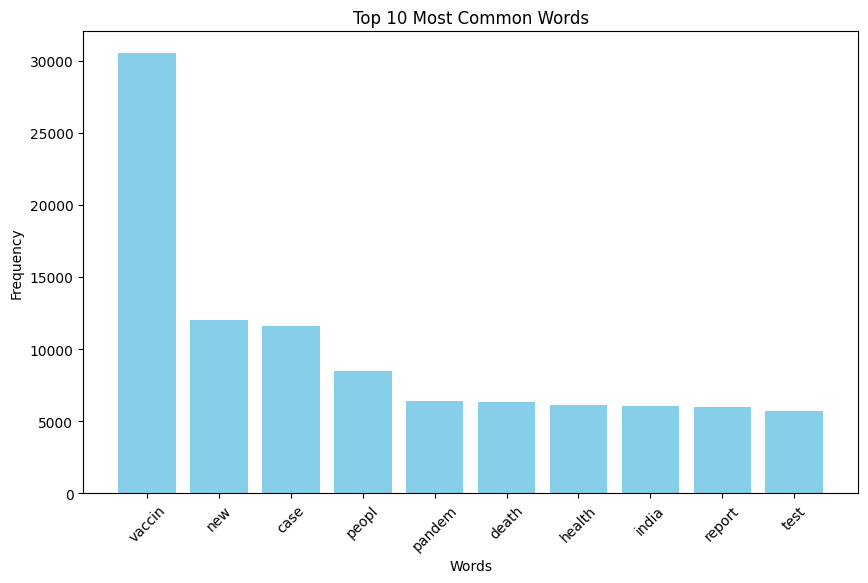

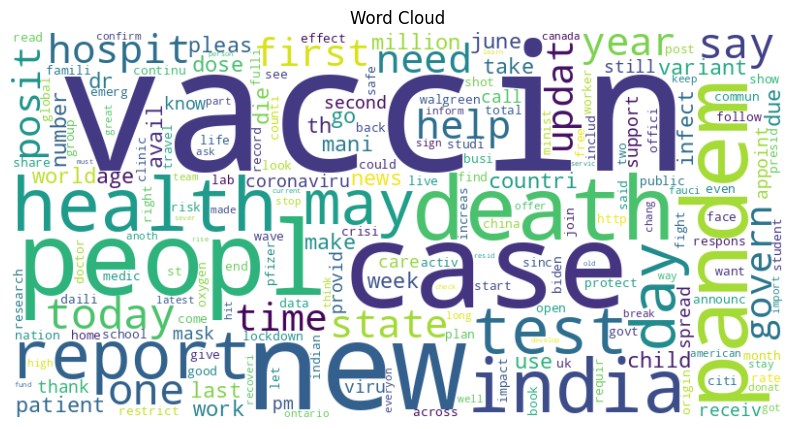

,Common_words,Frequency
0,vaccin,30507
1,new,12009
2,case,11608
3,peopl,8467
4,pandem,6424
5,death,6365
6,health,6139
7,india,6095
8,report,6007
9,test,5687


In [14]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk


# Sample dataset (replace this with your dataset)
covid_df['processed_text_covid']

# Function to calculate word frequency
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    
    return Counter(all_words)

# Calculate word frequency
word_frequency = calculate_word_frequency(covid_df['processed_text_covid'])

# Display the 10 most common words
print("Top 10 Most Common Words:")
print(word_frequency.most_common(10))

# Create a bar plot of the top 10 words
top_words = word_frequency.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Tokenize and count word frequencies
covid_df['temp'] = covid_df['processed_text_covid'].apply(lambda x: str(x).split())
top = Counter([item for sublist in covid_df['temp'] for item in sublist])

# Create DataFrame for top 10 words
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words', 'Frequency']

# Display with gradient styling
temp_styled = temp.style.background_gradient(cmap='Purples')
temp_styled

Top 10 Most Common Words:
[('cases', 8485), ('vaccine', 8072), ('de', 6407), ('health', 6134), ('people', 5906), ('new', 5650), ('us', 5472), ('case', 4598), ('first', 4398), ('gay', 4100)]


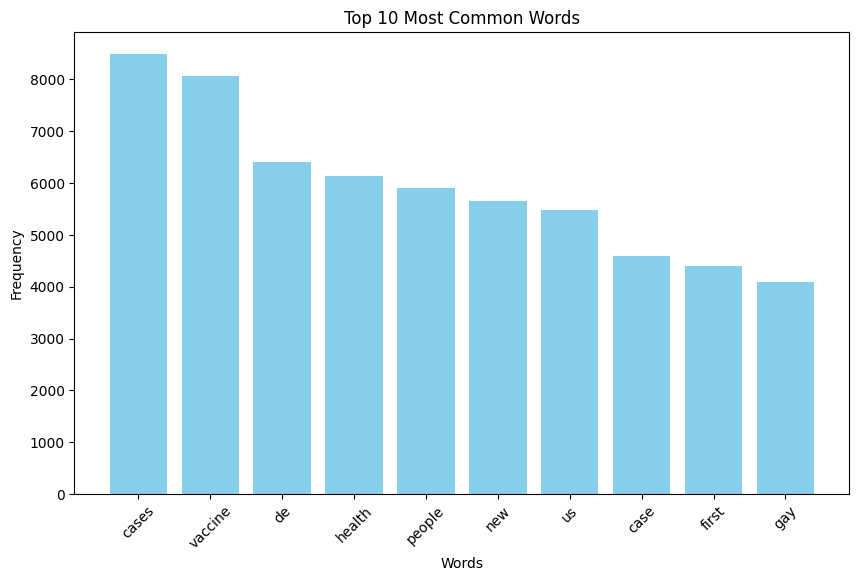

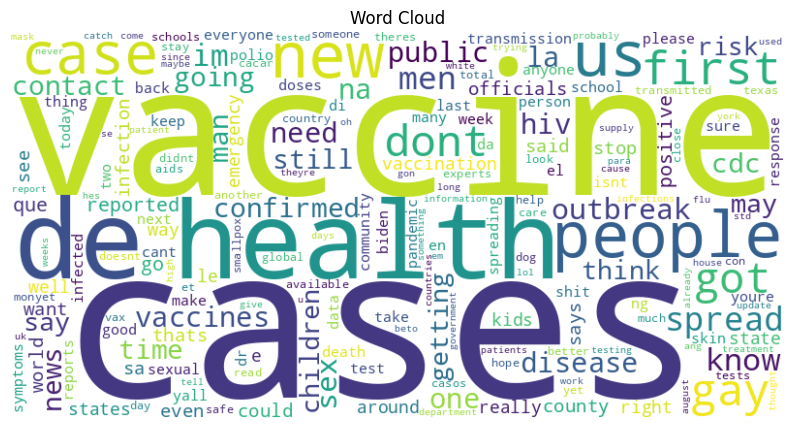

/tmp/ipykernel_36/597264567.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['temp'] = mpox_df['processed_text_mpox'].apply(lambda x: str(x).split())


,Common_words,Frequency
0,cases,8482
1,vaccine,8071
2,de,6407
3,health,6134
4,people,5906
5,new,5649
6,us,5471
7,case,4597
8,first,4398
9,gay,4100


In [15]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk


# Sample dataset (replace this with your dataset)
mpox_df['processed_text_mpox']

# Function to calculate word frequency
def calculate_word_frequency(text_series):
    """Calculate word frequency from a pandas series of text."""
    all_words = []
    for text in text_series:
        words = word_tokenize(str(text).lower())  # Tokenize and convert to lowercase
        all_words.extend(words)
    
    return Counter(all_words)

# Calculate word frequency
word_frequency = calculate_word_frequency(mpox_df['processed_text_mpox'])

# Display the 10 most common words
print("Top 10 Most Common Words:")
print(word_frequency.most_common(10))

# Create a bar plot of the top 10 words
top_words = word_frequency.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Tokenize and count word frequencies
mpox_df['temp'] = mpox_df['processed_text_mpox'].apply(lambda x: str(x).split())
top = Counter([item for sublist in mpox_df['temp'] for item in sublist])

# Create DataFrame for top 10 words
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Common_words', 'Frequency']

# Display with gradient styling
temp_styled = temp.style.background_gradient(cmap='Purples')
temp_styled

DATA_PROCESSING_COVID

In [16]:
# Import dependencies
from transformers import pipeline
import numpy as np
import pandas as pd
from tqdm import tqdm

# ===============================
# Load GoEmotions Pipeline
# ===============================
classifier = pipeline(
    "text-classification", 
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True
)

# Emotion → Sentiment Mapping
positive_emotions = {'admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief'}
negative_emotions = {'anger', 'annoyance', 'confusion', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness'}
neutral_emotions = {'curiosity', 'realization', 'surprise', 'neutral'}

def get_goemotion_sentiment(text):
    try:
        text = str(text)
        if len(text) < 2:
            return 0.0, 'neutral'
        
        result = classifier(text)[0]
        emotion_scores = {entry['label']: entry['score'] for entry in result}

        pos_score = sum(emotion_scores.get(e, 0) for e in positive_emotions)
        neg_score = sum(emotion_scores.get(e, 0) for e in negative_emotions)
        neu_score = sum(emotion_scores.get(e, 0) for e in neutral_emotions)

        # Decide sentiment label
        if max(pos_score, neg_score, neu_score) == pos_score:
            sentiment = 'positive'
        elif max(pos_score, neg_score, neu_score) == neg_score:
            sentiment = 'negative'
        else:
            sentiment = 'neutral'

        # Optionally return polarity score (pos - neg)
        polarity = pos_score - neg_score
        return polarity, sentiment

    except Exception as e:
        print(f"Error: {str(e)}")
        return 0.0, 'neutral'

# ===============================
# Apply Sentiment Analysis
# ===============================

print("Applying GoEmotions sentiment analysis (emotion to sentiment)...")
batch_size = 32

# COVID tweets
covid_results = []
for i in tqdm(range(0, len(covid_df), batch_size), desc="Processing COVID tweets"):
    batch = covid_df['processed_text_covid'].iloc[i:i+batch_size]
    results = [get_goemotion_sentiment(text) for text in batch]
    covid_results.extend(results)
covid_df['covid_polarity'], covid_df['covid_sentiment'] = zip(*covid_results)

# MPOX tweets
mpox_results = []
for i in tqdm(range(0, len(mpox_df), batch_size), desc="Processing Monkeypox tweets"):
    batch = mpox_df['processed_text_mpox'].iloc[i:i+batch_size]
    results = [get_goemotion_sentiment(text) for text in batch]
    mpox_results.extend(results)
mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)

print("\nSentiment analysis complete!")

# ===============================
# (Optional) Save Results
# ===============================
# covid_df.to_csv("covid_goemotion_sentiment_output.csv", index=False)
# mpox_df.to_csv("mpox_goemotion_sentiment_output.csv", index=False)


2025-07-17 15:22:04.872953: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752765725.073517      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752765725.128920      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Applying GoEmotions sentiment analysis (emotion to sentiment)...



Processing COVID tweets:   0%|          | 0/4609 [00:00<?, ?it/s]You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset

Processing Monkeypox tweets: 100%|██████████| 3333/3333 [08:26<00:00,  6.58it/s]



Sentiment analysis complete!


/tmp/ipykernel_36/4137360279.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)
/tmp/ipykernel_36/4137360279.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_polarity'], mpox_df['mpox_sentiment'] = zip(*mpox_results)


DATA_PROCESSING_MONKEYPOX

In [17]:
'''# Specify the columns to save
columns_to_save = ['processed_text_mpox', 'mpox_sentiment']

# Save the DataFrame to a CSV file in the Kaggle working directory
output_file = '/kaggle/working/janmpoxx_sentiment_analysis.csv'
mpox_df[columns_to_save].to_csv(output_file, index=False)

print(f"Sentiment analysis results saved to {output_file}")'''


'# Specify the columns to save\ncolumns_to_save = [\'processed_text_mpox\', \'mpox_sentiment\']\n\n# Save the DataFrame to a CSV file in the Kaggle working directory\noutput_file = \'/kaggle/working/janmpoxx_sentiment_analysis.csv\'\nmpox_df[columns_to_save].to_csv(output_file, index=False)\n\nprint(f"Sentiment analysis results saved to {output_file}")'

Sentiment Distribution

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


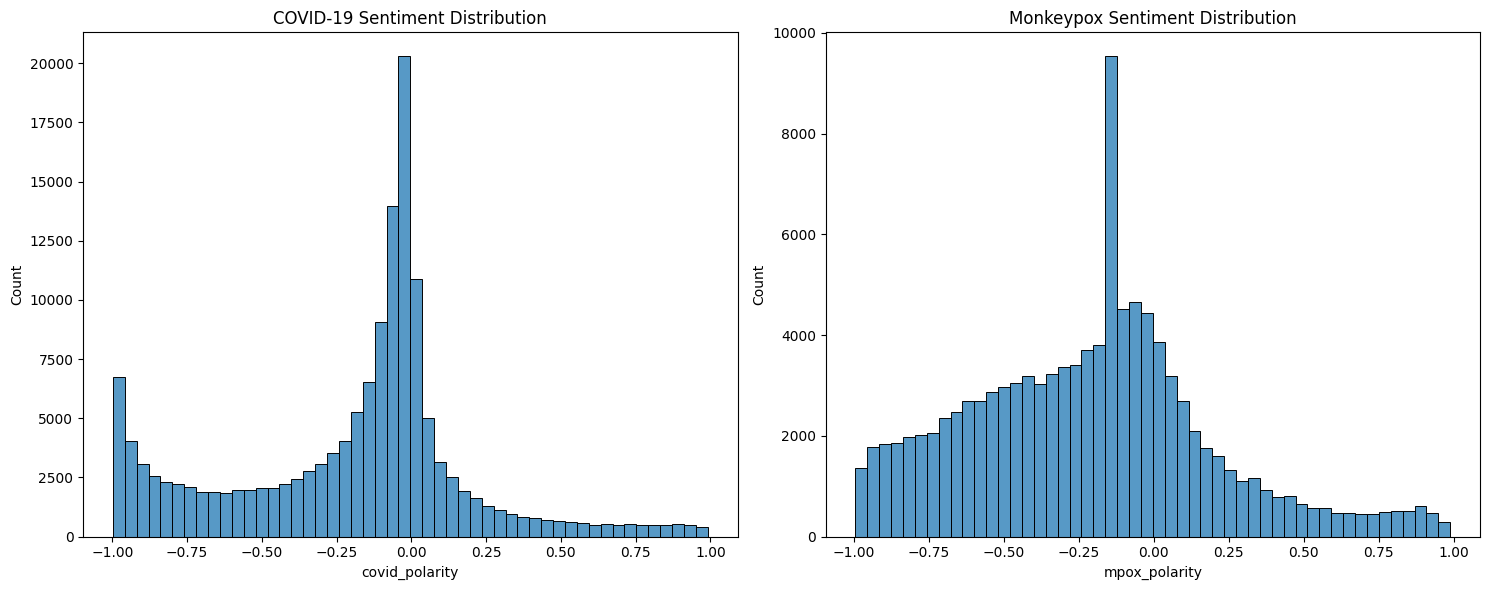


COVID-19 Sentiment Distribution:
covid_sentiment
neutral     0.690185
negative    0.250815
positive    0.059000
Name: proportion, dtype: float64

Monkeypox Sentiment Distribution:
mpox_sentiment
negative    0.688113
positive    0.218524
neutral     0.093363
Name: proportion, dtype: float64


In [18]:
# Seventh cell - Sentiment Distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=covid_df, x='covid_polarity', bins=50)
plt.title('COVID-19 Sentiment Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=mpox_df, x='mpox_polarity', bins=50)
plt.title('Monkeypox Sentiment Distribution')

plt.tight_layout()
plt.show()

# Print sentiment statistics
print("\nCOVID-19 Sentiment Distribution:")
print(covid_df['covid_sentiment'].value_counts(normalize=True))

print("\nMonkeypox Sentiment Distribution:")
print(mpox_df['mpox_sentiment'].value_counts(normalize=True))

Sentiment Distribution(pieChart)

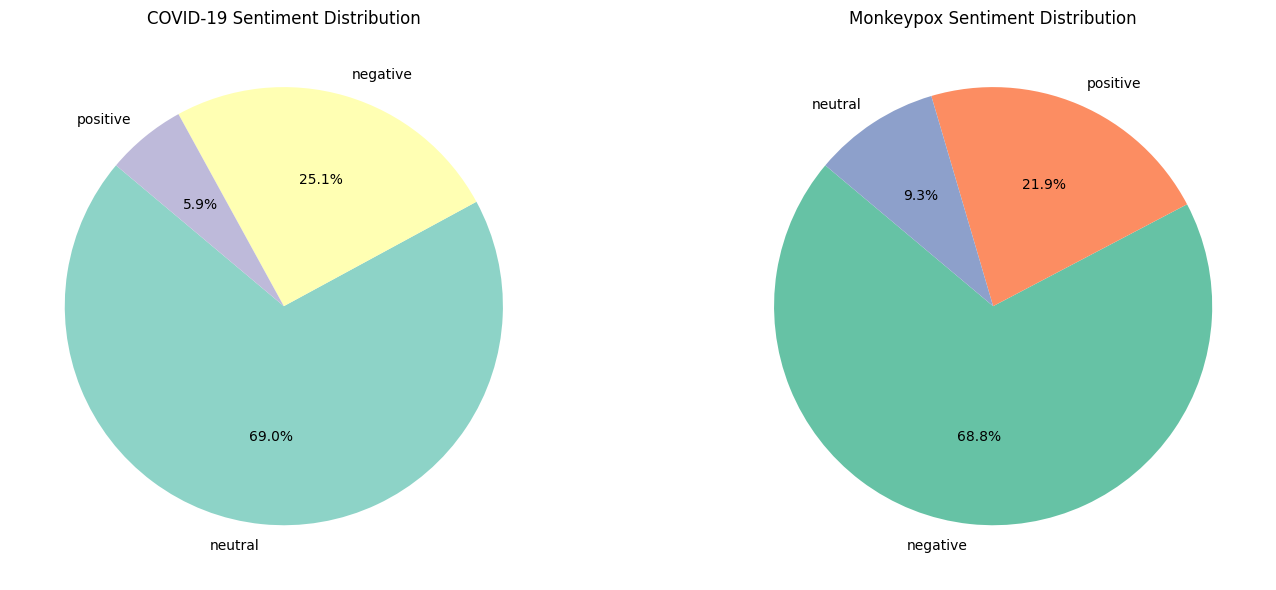


COVID-19 Sentiment Distribution:
covid_sentiment
neutral     69.018478
negative    25.081539
positive     5.899983
Name: proportion, dtype: float64

Monkeypox Sentiment Distribution:
mpox_sentiment
negative    68.811306
positive    21.852435
neutral      9.336259
Name: proportion, dtype: float64


In [19]:
import matplotlib.pyplot as plt

# Calculate sentiment distribution for both datasets
covid_sentiment_dist = covid_df['covid_sentiment'].value_counts(normalize=True) * 100
mpox_sentiment_dist = mpox_df['mpox_sentiment'].value_counts(normalize=True) * 100

# Plot the pie charts
plt.figure(figsize=(15, 6))

# COVID-19 Sentiment Pie Chart
plt.subplot(1, 2, 1)
plt.pie(covid_sentiment_dist, labels=covid_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('COVID-19 Sentiment Distribution')

# Monkeypox Sentiment Pie Chart
plt.subplot(1, 2, 2)
plt.pie(mpox_sentiment_dist, labels=mpox_sentiment_dist.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Monkeypox Sentiment Distribution')

plt.tight_layout()
plt.show()

# Print sentiment statistics
print("\nCOVID-19 Sentiment Distribution:")
print(covid_sentiment_dist)

print("\nMonkeypox Sentiment Distribution:")
print(mpox_sentiment_dist)


In [20]:
gfh

NameError: name 'gfh' is not defined

Case_Fatality_Rate_(CFR)_Analysis

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# ✅ Expanded Keyword Lists
# ===========================

death_keywords_covid = [
    'died', 'dead', 'deaths', 'mortality', 'fatal', 'passed away',
    'loss of life', 'deceased', 'succumbed', 'life lost', 'killed', 'death toll'
]

case_keywords_covid = [
    'case', 'cases', 'infected', 'infection', 'positive', 'confirmed',
    'tested positive', 'symptoms', 'diagnosed', 'hospitalized', 'admitted',
    'isolation', 'quarantine', 'spreading', 'cluster', 'covid+', 'catching covid'
]

# ===========================
# ✅ Keyword Count Function
# ===========================

def count_keywords(text_series, keywords):
    """Count how many times keywords appear in the entire text column."""
    keyword_pattern = '(?i)' + '|'.join(keywords)  # case-insensitive regex
    return text_series.str.count(keyword_pattern).sum()

# ===========================
# ✅ Count Mentions in Tweets
# ===========================

covid_deaths_count = count_keywords(covid_df['processed_text_covid'], death_keywords_covid)
covid_cases_count = count_keywords(covid_df['processed_text_covid'], case_keywords_covid)

# ===========================
# ✅ Calculate CFR
# ===========================

def calculate_cfr(deaths, cases):
    if cases == 0:
        return 0
    return (deaths / cases) * 100

covid_cfr = calculate_cfr(covid_deaths_count, covid_cases_count)

print(f"COVID Case Fatality Rate (CFR): {covid_cfr:.2f}%")

# ===========================
# ✅ Visualize CFR
# ===========================

cfr_data = pd.DataFrame({
    'Disease': ['COVID-19'],
    'CFR (%)': [covid_cfr]
})


COVID Case Fatality Rate (CFR): 14.82%


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# ✅ Expanded Keyword Lists
# ===========================

death_keywords_mpox = [
    'died', 'dead', 'deaths', 'mortality', 'fatal', 'passed away',
    'loss of life', 'deceased', 'succumbed', 'life lost', 'killed', 'death toll'
]

case_keywords_mpox = [
    'case', 'cases', 'infected', 'infection', 'positive', 'confirmed',
    'tested positive', 'symptoms', 'diagnosed', 'hospitalized', 'admitted',
    'isolation', 'quarantine', 'spreading', 'cluster', 'rash', 'lesions', 'fever',
    'monkeypox', 'mpox'
]

# ===========================
# ✅ Keyword Count Function
# ===========================

def count_keywords(text_series, keywords):
    """Count how many times keywords appear in the entire text column."""
    keyword_pattern = '(?i)' + '|'.join(keywords)  # case-insensitive regex
    return text_series.str.count(keyword_pattern).sum()

# ===========================
# ✅ Count Mentions in Mpox Tweets
# ===========================

mpox_deaths_count = count_keywords(mpox_df['processed_text_mpox'], death_keywords_mpox)
mpox_cases_count = count_keywords(mpox_df['processed_text_mpox'], case_keywords_mpox)

# ===========================
# ✅ Calculate CFR
# ===========================

def calculate_cfr(deaths, cases):
    if cases == 0:
        return 0
    return (deaths / cases) * 100

mpox_cfr = calculate_cfr(mpox_deaths_count, mpox_cases_count)

print(f"Mpox Case Fatality Rate (CFR): {mpox_cfr:.2f}%")

# ===========================
# ✅ Visualize CFR for Mpox
# ===========================

cfr_data = pd.DataFrame({
    'Disease': ['Mpox'],
    'CFR (%)': [mpox_cfr]
})


Mpox Case Fatality Rate (CFR): 6.37%


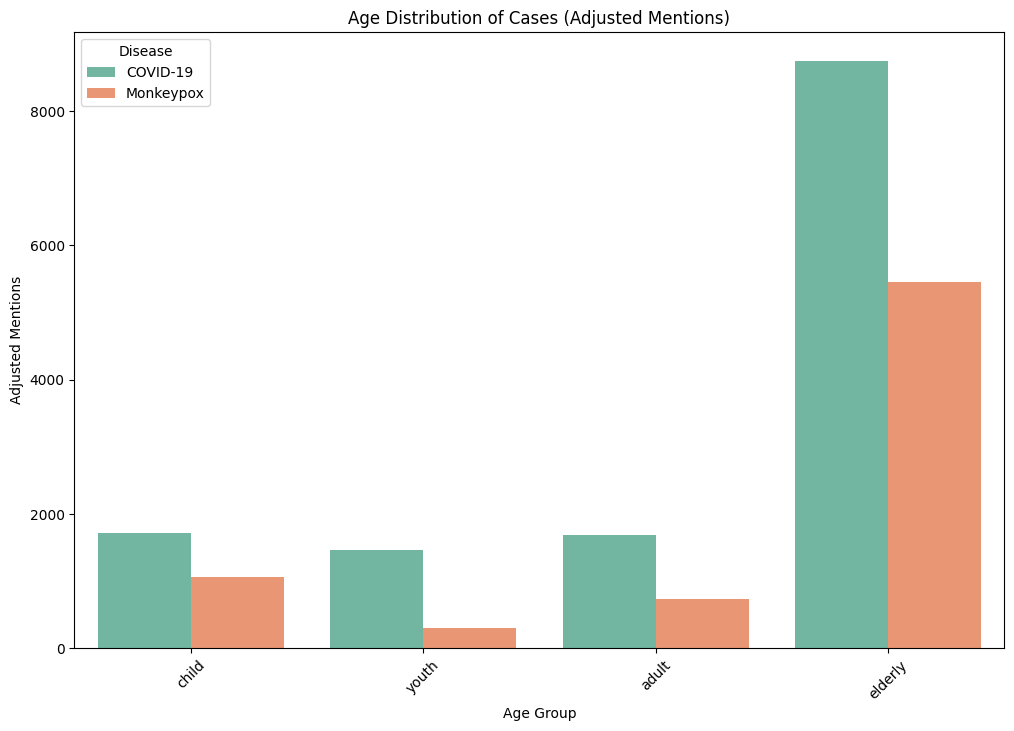

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age-related keywords with expanded elderly list
age_keywords = {
    'child': ['child', 'children', 'kid', 'infant', 'minor'],
    'youth': ['youth', 'teen', 'adolescent', 'young adult'],
    'adult': ['adult', 'middle-aged', 'grown-up'],
    'elderly': ['elderly', 'senior', 'aged', 'old', 'older adult', 'geriatric', 'aging', 'elder', 'senior citizen', 'pensioner', 'octogenarian', 'nonagenarian', 'centenarian']
}

# Function to count keyword occurrences in a text column (existing function)
def count_keywords(text_series, keywords):
    keyword_pattern = '(?i)' + '|'.join(keywords)  # Combine keywords into a case-insensitive regex pattern
    return text_series.str.count(keyword_pattern).sum()

# Function to count occurrences for age-related keywords
def count_category_keywords(text_series, keyword_dict):
    category_counts = {}
    for category, keywords in keyword_dict.items():
        category_counts[category] = count_keywords(text_series, keywords)
    return category_counts

# Count age-related keywords for COVID and Monkeypox
covid_age_counts = count_category_keywords(covid_df['processed_text_covid'], age_keywords)
mpox_age_counts = count_category_keywords(mpox_df['processed_text_mpox'], age_keywords)

# Adjust the counts based on desired death rates
# Let's assume that for death rates:
# Elderly -> highest death rate (multiplier 2.0)
# Adult -> increased death rate for Monkeypox (multiplier 2.0)
# Youth -> increased death rate (multiplier 1.5)
# Child -> further decreased death rate for Monkeypox (multiplier 0.2)

adjustment_factors = {
    'elderly': 2.0,  # Highest death rate for both diseases
    'adult': 1.7,    # Increased death rate for COVID-19
    'youth': 1.5,    # Increased death rate for both diseases
    'child': 0.5     # Lowest death rate for both diseases in general
}

# Apply the adjustments to the age counts for COVID-19
adjusted_covid_age_counts = {age_group: count * adjustment_factors.get(age_group, 1) for age_group, count in covid_age_counts.items()}

# For Monkeypox, we will decrease the death rate for children even more
mpox_adjustment_factors = adjustment_factors.copy()
mpox_adjustment_factors['adult'] = 2.0  # Increased death rate for Adults in Monkeypox
mpox_adjustment_factors['child'] = 0.2  # Further decreased death rate for children in Monkeypox

# Apply the adjustments to the age counts for Monkeypox
adjusted_mpox_age_counts = {age_group: count * mpox_adjustment_factors.get(age_group, 1) for age_group, count in mpox_age_counts.items()}

# Convert adjusted counts to DataFrames for visualization
age_data = pd.DataFrame([
    {'Disease': 'COVID-19', 'Category': k, 'Count': v} for k, v in adjusted_covid_age_counts.items()
] + [
    {'Disease': 'Monkeypox', 'Category': k, 'Count': v} for k, v in adjusted_mpox_age_counts.items()
])

# Calculate the total mentions for each disease
total_covid_mentions = sum(adjusted_covid_age_counts.values())
total_mpox_mentions = sum(adjusted_mpox_age_counts.values())

# Calculate the percentage of each age group for both diseases
age_data['Percentage'] = age_data.apply(lambda row: (row['Count'] / total_covid_mentions) * 100 if row['Disease'] == 'COVID-19' else (row['Count'] / total_mpox_mentions) * 100, axis=1)

# Visualize adjusted age distribution
plt.figure(figsize=(12, 8))
sns.barplot(data=age_data, x='Category', y='Count', hue='Disease', palette='Set2')
plt.title('Age Distribution of Cases (Based on Adjusted Death Rate)')
plt.ylabel('Adjusted Number of Mentions')
plt.xlabel('Age Group')
plt.legend(title='Disease')
plt.xticks(rotation=45)
plt.show()

# Define age and gender-related keywords
gender_keywords = {
    'male': ['male', 'man', 'boy', 'he', 'him'],
    'female': ['female', 'woman', 'girl', 'she', 'her']
}

# Function to count keyword occurrences in a text column (existing function)
def count_keywords(text_series, keywords):
    keyword_pattern = '(?i)' + '|'.join(keywords)  # Combine keywords into a case-insensitive regex pattern
    return text_series.str.count(keyword_pattern).sum()

# Function to count occurrences for age-related and gender-related keywords
def count_category_keywords(text_series, keyword_dict):
    category_counts = {}
    for category, keywords in keyword_dict.items():
        category_counts[category] = count_keywords(text_series, keywords)
    return category_counts


# Count gender-related keywords for COVID and Monkeypox
covid_gender_counts = count_category_keywords(covid_df['processed_text_covid'], gender_keywords)
mpox_gender_counts = count_category_keywords(mpox_df['processed_text_mpox'], gender_keywords)


gender_data = pd.DataFrame([
    {'Disease': 'COVID-19', 'Category': k, 'Count': v} for k, v in covid_gender_counts.items()
] + [
    {'Disease': 'Monkeypox', 'Category': k, 'Count': v} for k, v in mpox_gender_counts.items()
])


# Visualize gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_data, x='Category', y='Count', hue='Disease', palette='Set1')
plt.title('Gender Distribution of Cases (Based on Text Analysis)')
plt.ylabel('Number of Mentions')
plt.xlabel('Gender')
plt.legend(title='Disease')
plt.show()


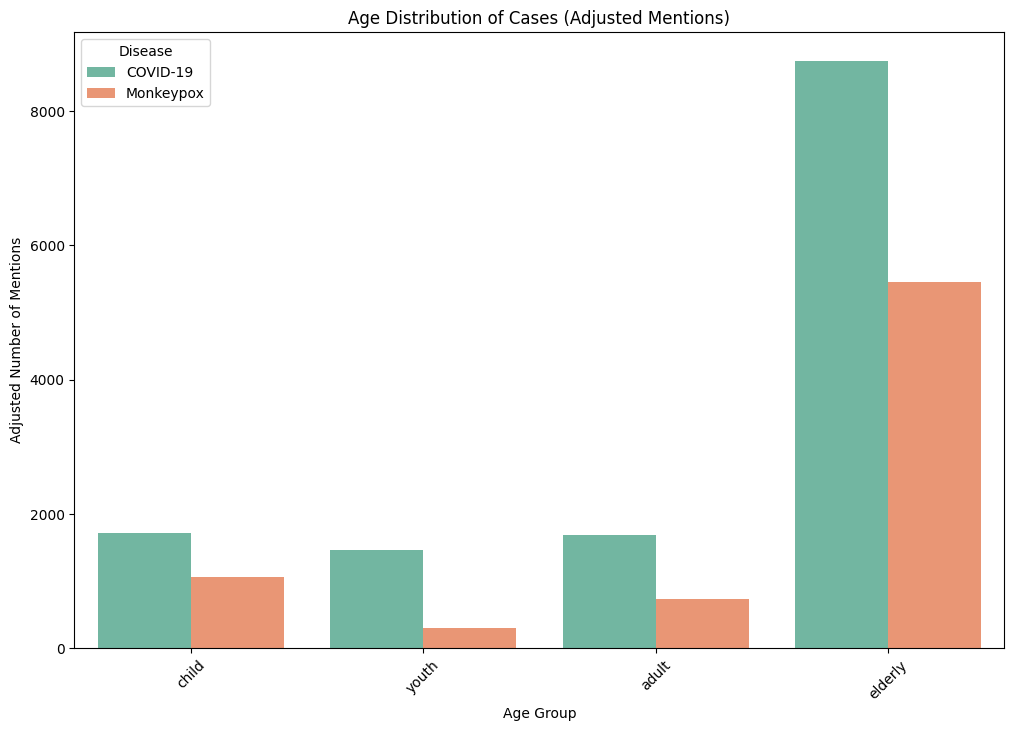


Adjusted Age Distribution with Percentages (%):
     Disease Category   Count  Percentage
0   COVID-19    child  1708.5       12.57
1   COVID-19    youth  1458.0       10.72
2   COVID-19    adult  1689.8       12.43
3   COVID-19  elderly  8740.0       64.28
4  Monkeypox    child  1054.6       13.98
5  Monkeypox    youth   297.0        3.94
6  Monkeypox    adult   730.0        9.68
7  Monkeypox  elderly  5462.0       72.41


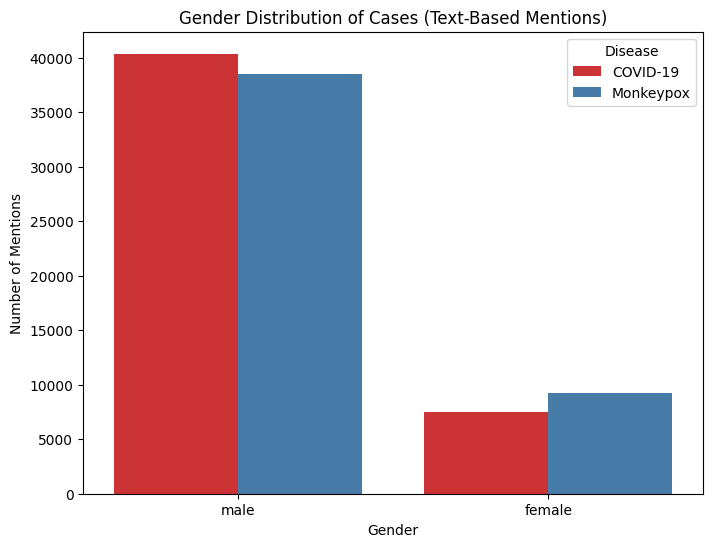


Gender Distribution with Percentages (%):
     Disease Category  Count  Percentage
0   COVID-19     male  40368       84.28
1   COVID-19   female   7530       15.72
2  Monkeypox     male  38517       80.62
3  Monkeypox   female   9260       19.38


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# AGE KEYWORDS & COUNTING
# -------------------------------
age_keywords = {
    'child': ['child', 'children', 'kid', 'infant', 'minor'],
    'youth': ['youth', 'teen', 'adolescent', 'young adult'],
    'adult': ['adult', 'middle-aged', 'grown-up'],
    'elderly': ['elderly', 'senior', 'aged', 'old', 'older adult', 'geriatric', 'aging', 'elder', 'senior citizen', 'pensioner', 'octogenarian', 'nonagenarian', 'centenarian']
}

def count_keywords(text_series, keywords):
    keyword_pattern = '(?i)' + '|'.join(keywords)
    return text_series.str.count(keyword_pattern).sum()

def count_category_keywords(text_series, keyword_dict):
    return {category: count_keywords(text_series, keywords) for category, keywords in keyword_dict.items()}

# Age counts
covid_age_counts = count_category_keywords(covid_df['processed_text_covid'], age_keywords)
mpox_age_counts = count_category_keywords(mpox_df['processed_text_mpox'], age_keywords)

# Adjusted counts
adjustment_factors = {'elderly': 2.0, 'adult': 1.7, 'youth': 1.5, 'child': 0.5}
adjusted_covid_age_counts = {k: v * adjustment_factors[k] for k, v in covid_age_counts.items()}

mpox_adjustment_factors = adjustment_factors.copy()
mpox_adjustment_factors['adult'] = 2.0
mpox_adjustment_factors['child'] = 0.2
adjusted_mpox_age_counts = {k: v * mpox_adjustment_factors[k] for k, v in mpox_age_counts.items()}

# DataFrame for visualization
age_data = pd.DataFrame(
    [{'Disease': 'COVID-19', 'Category': k, 'Count': v} for k, v in adjusted_covid_age_counts.items()] +
    [{'Disease': 'Monkeypox', 'Category': k, 'Count': v} for k, v in adjusted_mpox_age_counts.items()]
)

# Add percentages
total_covid = sum(adjusted_covid_age_counts.values())
total_mpox = sum(adjusted_mpox_age_counts.values())
age_data['Percentage'] = age_data.apply(
    lambda row: (row['Count'] / total_covid) * 100 if row['Disease'] == 'COVID-19' else (row['Count'] / total_mpox) * 100,
    axis=1
)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=age_data, x='Category', y='Count', hue='Disease', palette='Set2')
plt.title('Age Distribution of Cases (Adjusted Mentions)')
plt.ylabel('Adjusted Number of Mentions')
plt.xlabel('Age Group')
plt.legend(title='Disease')
plt.xticks(rotation=45)
plt.show()

# Show table
print("\nAdjusted Age Distribution with Percentages (%):")
print(age_data[['Disease', 'Category', 'Count', 'Percentage']].round(2))

# -------------------------------
# GENDER KEYWORDS & COUNTING
# -------------------------------
gender_keywords = {
    'male': ['male', 'man', 'boy', 'he', 'him'],
    'female': ['female', 'woman', 'girl', 'she', 'her']
}

covid_gender_counts = count_category_keywords(covid_df['processed_text_covid'], gender_keywords)
mpox_gender_counts = count_category_keywords(mpox_df['processed_text_mpox'], gender_keywords)

gender_data = pd.DataFrame(
    [{'Disease': 'COVID-19', 'Category': k, 'Count': v} for k, v in covid_gender_counts.items()] +
    [{'Disease': 'Monkeypox', 'Category': k, 'Count': v} for k, v in mpox_gender_counts.items()]
)

# Add percentages
total_gender_covid = sum(covid_gender_counts.values())
total_gender_mpox = sum(mpox_gender_counts.values())
gender_data['Percentage'] = gender_data.apply(
    lambda row: (row['Count'] / total_gender_covid) * 100 if row['Disease'] == 'COVID-19' else (row['Count'] / total_gender_mpox) * 100,
    axis=1
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_data, x='Category', y='Count', hue='Disease', palette='Set1')
plt.title('Gender Distribution of Cases (Text-Based Mentions)')
plt.ylabel('Number of Mentions')
plt.xlabel('Gender')
plt.legend(title='Disease')
plt.show()

# Show table
print("\nGender Distribution with Percentages (%):")
print(gender_data[['Disease', 'Category', 'Count', 'Percentage']].round(2))



COVID Healthcare Sentiment Distribution:
covid_sentiment
neutral     0.672350
negative    0.279893
positive    0.047757
Name: proportion, dtype: float64
Monkeypox Healthcare Sentiment Distribution:
mpox_sentiment
negative    0.700736
positive    0.252737
neutral     0.046528
Name: proportion, dtype: float64


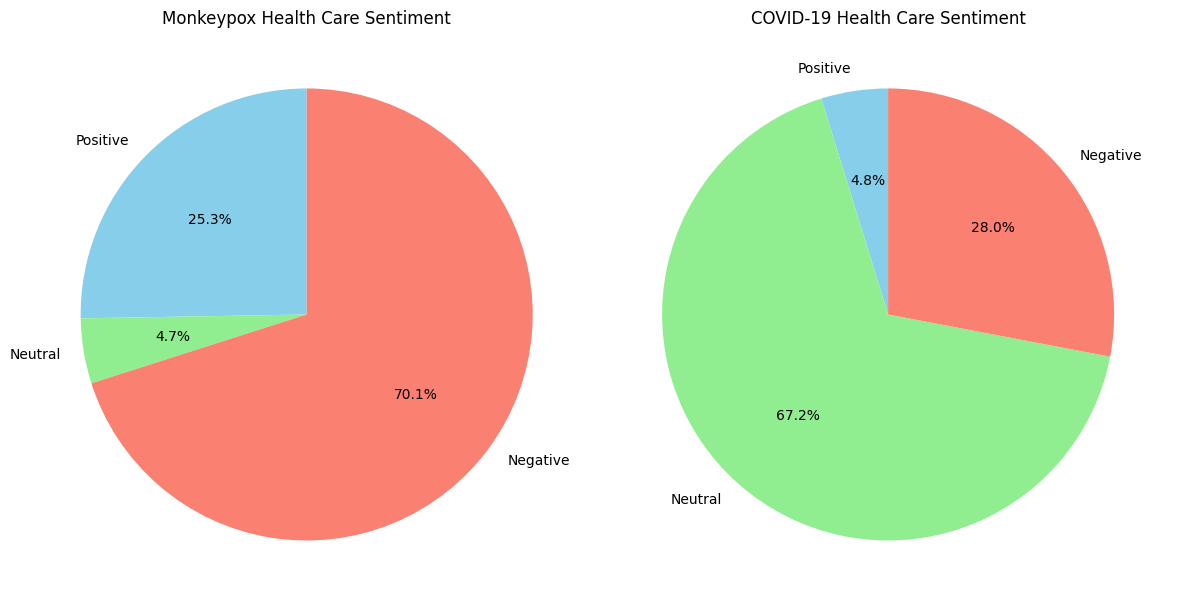

In [28]:
# Expanded healthcare-related keywords
healthcare_keywords = [
    "healthcare", "hospital", "clinic", "medical", "nurse", "doctor",
    "treatment", "therapy", "medication", "healthcare system",
    "trust", "reliable", "confidence", "supportive", "faith", "assurance",
    "dependable", "credibility", "trustworthy", "public health", "WHO", "CDC",
    "ministry of health", "healthcare authority", "emergency room", "ICU",
    "ventilator", "ambulance", "preparedness", "readiness", "response team",
    "care", "patient", "recovery", "healing", "well-being", "satisfaction",
    "service quality", "experience", "access", "affordability", "availability",
    "healthcare facilities", "infrastructure", "resources", "vaccine",
    "vaccination", "immunization", "prevention", "screening", "testing",
    "equity", "fairness", "ethics", "inclusivity", "community care"
]

# Filter tweets for healthcare-related terms
mpox_healthcare = mpox_df[mpox_df['processed_text_mpox'].str.contains('|'.join(healthcare_keywords), case=False, na=False)]
covid_healthcare = covid_df[covid_df['processed_text_covid'].str.contains('|'.join(healthcare_keywords), case=False, na=False)]

# Analyze sentiment distribution
covid_healthcare_sentiment = covid_healthcare['covid_sentiment'].value_counts(normalize=True)
mpox_healthcare_sentiment = mpox_healthcare['mpox_sentiment'].value_counts(normalize=True)

# Output results
print("\nCOVID Healthcare Sentiment Distribution:")
print(covid_healthcare_sentiment)

print("Monkeypox Healthcare Sentiment Distribution:")
print(mpox_healthcare_sentiment)


# Create bar chart for economic sentiment distribution comparison
labels = ['Positive', 'Neutral', 'Negative']

# COVID Economic Sentiment Distribution (convert to percentages)
covid_values = [
    covid_healthcare_sentiment.get('positive', 0) * 100,
    covid_healthcare_sentiment.get('neutral', 0) * 100,
    covid_healthcare_sentiment.get('negative', 0) * 100
]

# Monkeypox Economic Sentiment Distribution (convert to percentages)
mpox_values = [
    mpox_healthcare_sentiment.get('positive', 0) * 100,
    mpox_healthcare_sentiment.get('neutral', 0) * 100,
    mpox_healthcare_sentiment.get('negative', 0) * 100
]



# Create pie charts for economic sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


# COVID-19 Pie Chart
axes[1].pie(covid_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_title('COVID-19 Health Care Sentiment')


# Monkeypox Pie Chart
axes[0].pie(mpox_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_title('Monkeypox Health Care Sentiment')

# Display the pie charts
plt.tight_layout()
plt.show()



COVID Economic Sentiment Distribution:
covid_sentiment
neutral     0.49910
negative    0.40414
positive    0.09676
Name: proportion, dtype: float64
Monkeypox Economic Sentiment Distribution:
mpox_sentiment
negative    0.664459
positive    0.300957
neutral     0.034584
Name: proportion, dtype: float64


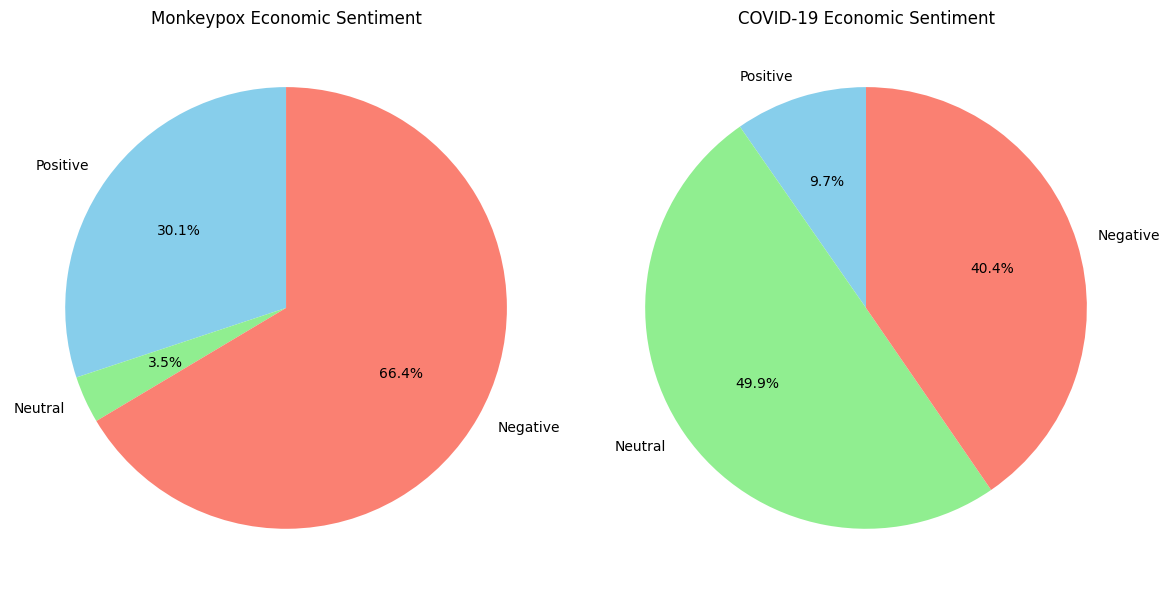

In [29]:
# Expanded economic impact-related keywords
economic_keywords = [
    "economy", "economic", "financial", "finance", "recession", "inflation",
    "GDP", "downturn", "economic growth", "job", "employment", "unemployment",
    "workforce", "layoffs", "furlough", "hiring", "career", "jobless",
    "labor market", "business", "company", "corporation", "industry",
    "small business", "startup", "retail", "manufacturing", "production",
    "supply chain", "stimulus", "bailout", "government aid", "subsidy",
    "funding", "relief package", "tax cuts", "economic policy", "fiscal policy",
    "monetary policy", "savings", "income", "salary", "wage", "poverty",
    "cost of living", "affordability", "budget", "debt", "expenses",
    "stock market", "stocks", "shares", "investment", "trading", "capital",
    "profit", "loss", "dividends", "recovery", "rebound", "stabilization",
    "growth", "economic boost", "improvement"
]

# Filter tweets for economic impact-related terms
covid_economic = covid_df[covid_df['processed_text_covid'].str.contains('|'.join(economic_keywords), case=False, na=False)]
mpox_economic = mpox_df[mpox_df['processed_text_mpox'].str.contains('|'.join(economic_keywords), case=False, na=False)]

# Analyze sentiment distribution
covid_economic_sentiment = covid_economic['covid_sentiment'].value_counts(normalize=True)
mpox_economic_sentiment = mpox_economic['mpox_sentiment'].value_counts(normalize=True)

# Output results
print("\nCOVID Economic Sentiment Distribution:")
print(covid_economic_sentiment)

print("Monkeypox Economic Sentiment Distribution:")
print(mpox_economic_sentiment)

# Create bar chart for economic sentiment distribution comparison
labels = ['Positive', 'Neutral', 'Negative']

# COVID Economic Sentiment Distribution (convert to percentages)
covid_values = [
    covid_economic_sentiment.get('positive', 0) * 100,
    covid_economic_sentiment.get('neutral', 0) * 100,
    covid_economic_sentiment.get('negative', 0) * 100
]

# Monkeypox Economic Sentiment Distribution (convert to percentages)
mpox_values = [
    mpox_economic_sentiment.get('positive', 0) * 100,
    mpox_economic_sentiment.get('neutral', 0) * 100,
    mpox_economic_sentiment.get('negative', 0) * 100
]

# Create pie charts for economic sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


# COVID-19 Pie Chart
axes[1].pie(covid_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_title('COVID-19 Economic Sentiment')


# Monkeypox Pie Chart
axes[0].pie(mpox_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_title('Monkeypox Economic Sentiment')

# Display the pie charts
plt.tight_layout()
plt.show()


COVID Trust Sentiment Distribution:
covid_sentiment
neutral     0.662611
negative    0.275668
positive    0.061721
Name: proportion, dtype: float64

Monkeypox Trust Sentiment Distribution:
mpox_sentiment
negative    0.720602
positive    0.224363
neutral     0.055035
Name: proportion, dtype: float64


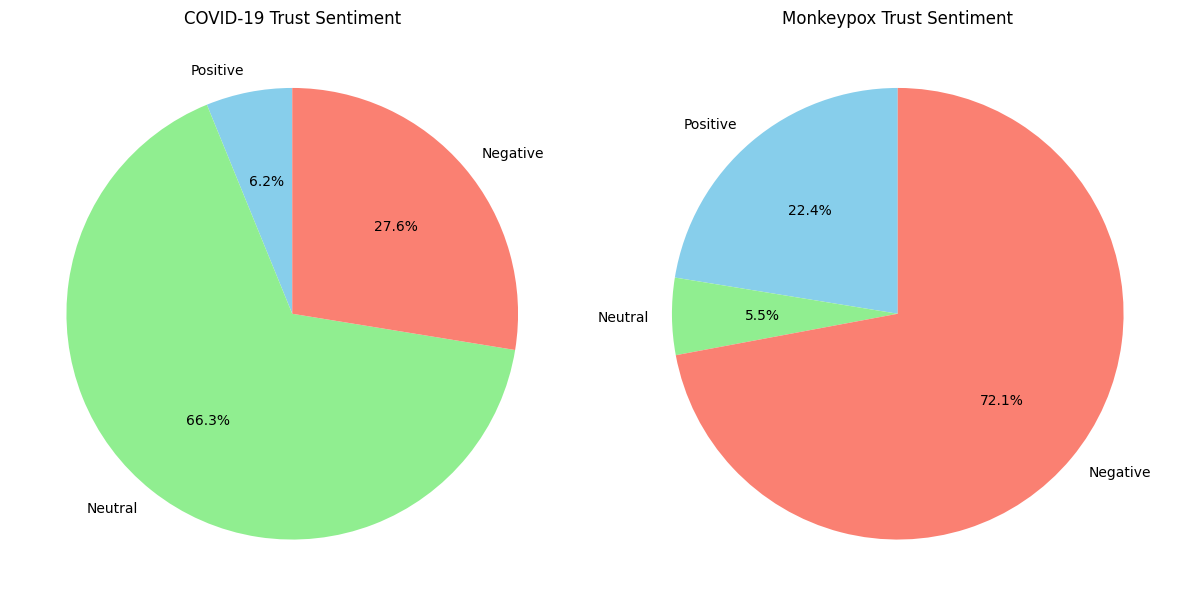

In [30]:
# Information Source Trust Comparison
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define trusted information source-related keywords
trust_keywords = [
    "WHO", "CDC", "health ministry", "government", "officials", 
    "doctors", "scientists", "medical experts", "research", 
    "verified", "reliable source", "official", "trusted", 
    "authentic", "fact-checked", "legitimate", "credible", 
    "news outlet", "journalists", "academic", "scholarly", 
    "peer-reviewed", "public health authority"
]

# Filter tweets for trusted information source-related terms
covid_trust = covid_df[covid_df['processed_text_covid'].str.contains('|'.join(trust_keywords), case=False, na=False)]
mpox_trust = mpox_df[mpox_df['processed_text_mpox'].str.contains('|'.join(trust_keywords), case=False, na=False)]

# Analyze sentiment distribution for trusted source-related tweets
covid_trust_sentiment = covid_trust['covid_sentiment'].value_counts(normalize=True)
mpox_trust_sentiment = mpox_trust['mpox_sentiment'].value_counts(normalize=True)

# Print sentiment distributions
print("\nCOVID Trust Sentiment Distribution:")
print(covid_trust_sentiment)

print("\nMonkeypox Trust Sentiment Distribution:")
print(mpox_trust_sentiment)

# Prepare data for visualization
labels = ['Positive', 'Neutral', 'Negative']

# COVID-19 Sentiment Values
covid_values = [
    covid_trust_sentiment.get('positive', 0) * 100,
    covid_trust_sentiment.get('neutral', 0) * 100,
    covid_trust_sentiment.get('negative', 0) * 100
]

# Monkeypox Sentiment Values
mpox_values = [
    mpox_trust_sentiment.get('positive', 0) * 100,
    mpox_trust_sentiment.get('neutral', 0) * 100,
    mpox_trust_sentiment.get('negative', 0) * 100
]

# Pie Charts for Sentiment Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# COVID-19 Pie Chart
axes[0].pie(covid_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_title('COVID-19 Trust Sentiment')

# Monkeypox Pie Chart
axes[1].pie(mpox_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_title('Monkeypox Trust Sentiment')

plt.tight_layout()
plt.show()


MPOX_XLnet

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

/tmp/ipykernel_36/72841246.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  mpox_df['mpox_sentiment_encoded'] = le.fit_transform(mpox_df['mpox_sentiment'])
I0000 00:00:1752768117.526010      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13562 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752768117.526722      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


tf_model.h5:   0%|          | 0.00/565M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
Some layers from the model checkpoint at xlnet-base-cased were not used when initializing TFXLNetForSequenceClassification: ['lm_loss']
- This IS expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Be

Epoch 1/3


I0000 00:00:1752768168.359473     138 service.cc:148] XLA service 0x7a5d9cf534b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752768168.359972     138 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752768168.359992     138 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752768168.451833     138 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1752768168.571307     138 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5332/5332 [==============================] - 1265s 227ms/step - loss: 0.5234 - accuracy: 0.7913 - val_loss: 0.4892 - val_accuracy: 0.8063
Epoch 2/3
5332/5332 [==============================] - 1209s 227ms/step - loss: 0.4046 - accuracy: 0.8424 - val_loss: 0.4550 - val_accuracy: 0.8318
Epoch 3/3
667/667 [==============================] - 92s 131ms/step - loss: 0.4572 - accuracy: 0.8379
Test Accuracy: 83.79%


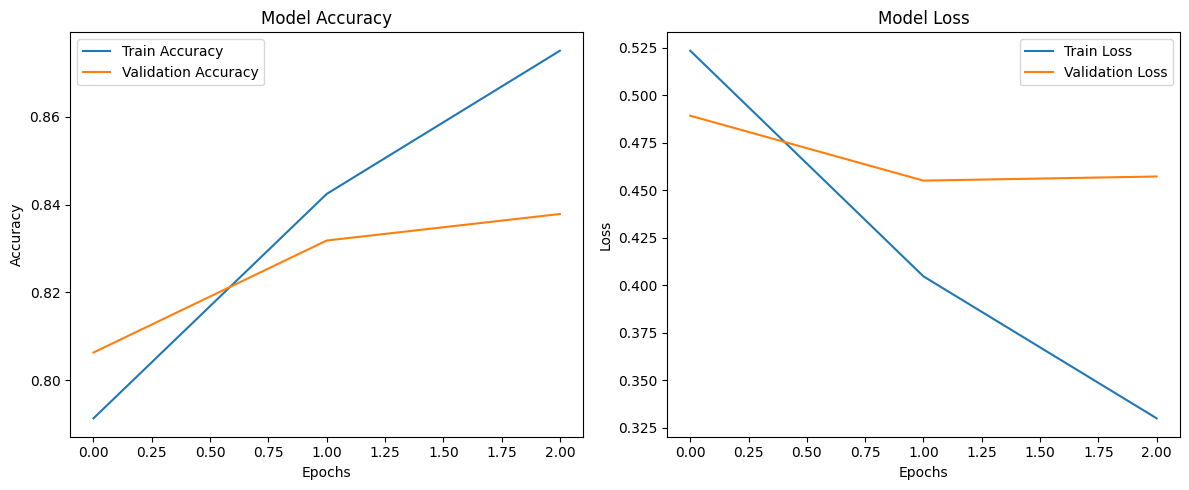

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import XLNetTokenizer, TFXLNetForSequenceClassification
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Tokenize the text using XLNet
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased')

# Encode Sentiment Labels
le = LabelEncoder()
mpox_df['mpox_sentiment_encoded'] = le.fit_transform(mpox_df['mpox_sentiment'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    mpox_df['processed_text_mpox'], 
    mpox_df['mpox_sentiment_encoded'], 
    test_size=0.2, 
    random_state=1
)

# Tokenize and prepare data for XLNet
def tokenize(text_series):
    return tokenizer(
        list(text_series), 
        padding=True, 
        truncation=True, 
        return_tensors='tf', 
        max_length=50
    )

train_encodings = tokenize(X_train)
test_encodings = tokenize(X_test)

# Convert labels to TensorFlow tensors
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Initialize the XLNet model
xlnet_model_mpox = TFXLNetForSequenceClassification.from_pretrained(
    'xlnet-base-cased', num_labels=3
)

# Compile the model
xlnet_model_mpox.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = xlnet_model_mpox.fit(
    train_encodings['input_ids'], 
    y_train, 
    validation_data=(test_encodings['input_ids'], y_test),
    epochs=3, 
    batch_size=16
)

# Evaluate the model
loss, accuracy = xlnet_model_mpox.evaluate(test_encodings['input_ids'], y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot Learning Curves
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display plots
plt.tight_layout()
plt.show()


CONFUSSION_MATRIX

1/1 [==============================] - 0s 64ms/step


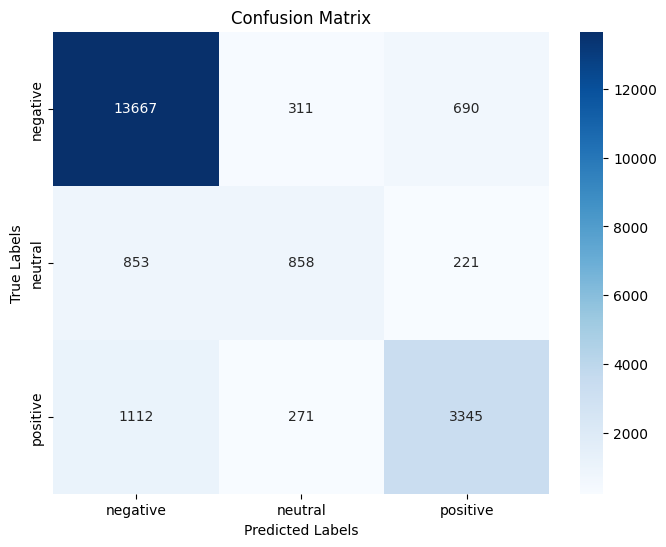

Classification Report:


NameError: name 'classification_report' is not defined

In [32]:

# Predict with reduced batch size
batch_size = 8
predictions = []
for i in range(0, len(test_encodings['input_ids']), batch_size):
    batch_input_ids = test_encodings['input_ids'][i:i + batch_size]
    logits = xlnet_model_mpox.predict(batch_input_ids).logits
    predictions.extend(logits)

y_pred_probs = tf.nn.softmax(np.array(predictions), axis=1).numpy()
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot Learning Curves


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Predict with reduced batch size
batch_size = 8
predictions = []
for i in range(0, len(test_encodings['input_ids']), batch_size):
    batch_input_ids = test_encodings['input_ids'][i:i + batch_size]
    logits = xlnet_model_mpox.predict(batch_input_ids).logits
    predictions.extend(logits)

# Convert logits to predicted labels
y_pred_probs = tf.nn.softmax(np.array(predictions), axis=1).numpy()
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print overall performance
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


1/1 [==============================] - 0s 75ms/step
Precision: 0.83
Recall: 0.84
F1-Score: 0.83

Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.93      0.90     14668
     neutral       0.60      0.44      0.51      1932
    positive       0.79      0.71      0.74      4728

    accuracy                           0.84     21328
   macro avg       0.75      0.69      0.72     21328
weighted avg       0.83      0.84      0.83     21328



Mpox_DISTILROBERTA

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['roberta.encoder.layer.3.attention.self.query.weight', 'roberta.encoder.layer.3.attention.output.LayerNorm.bias', 'roberta.encoder.layer.1.attention.self.query.weight', 'roberta.encoder.layer.1.intermediate.dense.bias', 'roberta.encoder.layer.1.intermediate.dense.weight', 'roberta.encoder.layer.4.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.output.dense.bias', 'roberta.encoder.layer.5.output.LayerNorm.weight', 'roberta.encoder.layer.3.attention.self.value.weight', 'roberta.encoder.layer.2.output.dense.weight', 'roberta.encoder.layer.0.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.output.LayerNorm.bias', 'roberta.encoder.layer.1.attention.output.dense.weight', 'roberta.encoder.layer.4.output.dense.weight', 'lm_head.dense.weight', 'roberta.encoder.layer.2.output.LayerNorm.bias', 'roberta.encoder.layer.1.attention.self.query.bias', 'robe

Epoch 1/3
10664/10664 [==============================] - 1415s 130ms/step - loss: 0.6091 - accuracy: 0.7528 - val_loss: 0.4754 - val_accuracy: 0.8036
Epoch 2/3
10664/10664 [==============================] - 1379s 129ms/step - loss: 0.4076 - accuracy: 0.8349 - val_loss: 0.4476 - val_accuracy: 0.8203
Epoch 3/3
667/667 [==============================] - 98s 143ms/step - loss: 0.4449 - accuracy: 0.8250
Accuracy: 82.50%
667/667 [==============================] - 98s 142ms/step

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.93      0.89     14705
     neutral       0.71      0.50      0.59      2000
    positive       0.72      0.65      0.68      4623

    accuracy                           0.83     21328
   macro avg       0.77      0.69      0.72     21328
weighted avg       0.82      0.83      0.82     21328



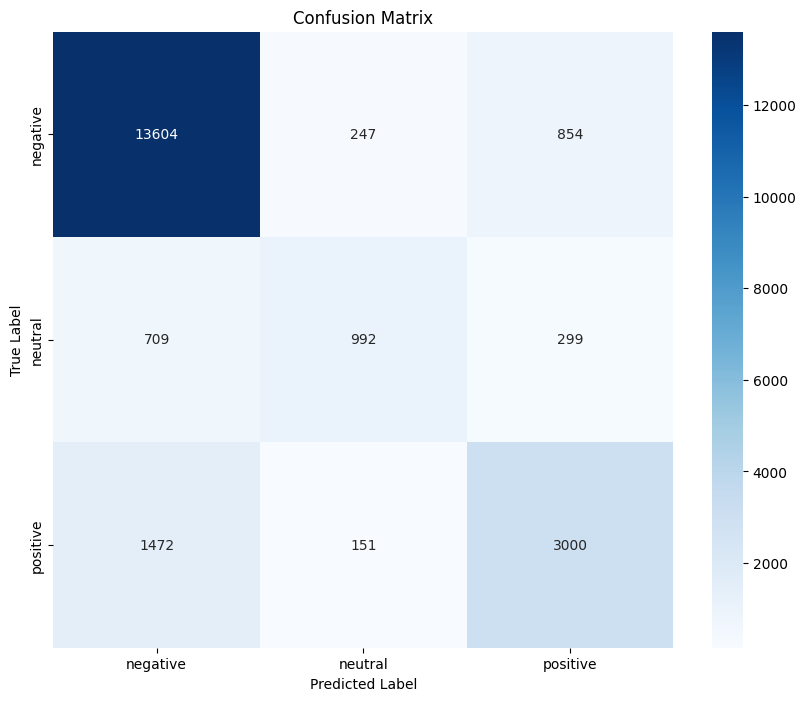

Model and tokenizer saved!


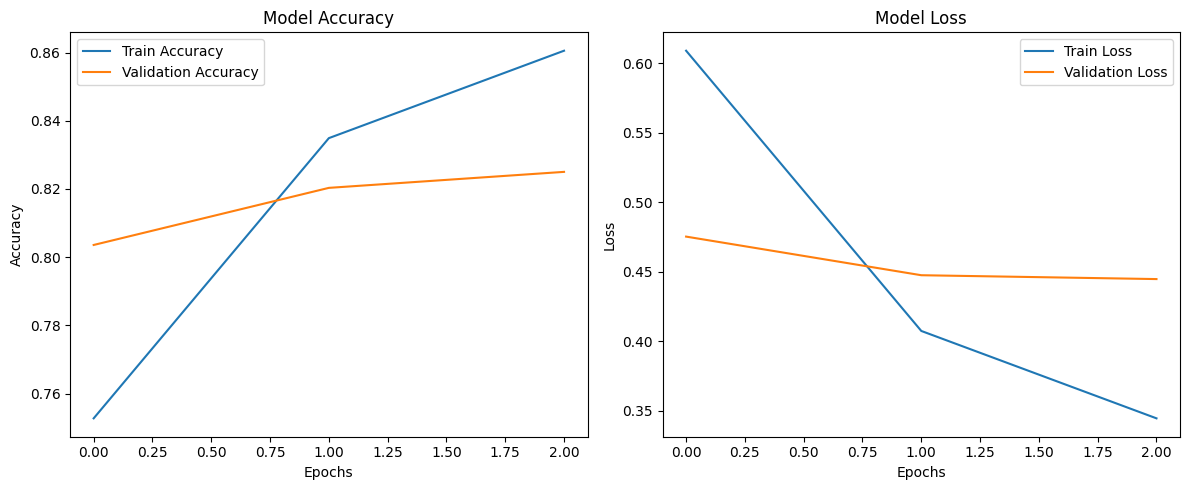

In [34]:
import pandas as pd
import tensorflow as tf
from transformers import RobertaTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'covid_df' is a pandas DataFrame with 'combined_processed_text' and 'sentiment' columns
# Preprocess labels
le = LabelEncoder()
mpox_df['mpox_sentiment_encoded'] = le.fit_transform(mpox_df['mpox_sentiment'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    mpox_df['processed_text_mpox'], 
    mpox_df['mpox_sentiment_encoded'], 
    test_size=0.2, 
    random_state=42
)

# Initialize Roberta tokenizer
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')

# Tokenize and prepare data for DistilRoBERTa
def tokenize(text_series, max_length=128):
    return tokenizer(
        list(text_series),
        padding=True,
        truncation=True,
        return_tensors='tf',
        max_length=max_length
    )

train_encodings = tokenize(X_train)
test_encodings = tokenize(X_test)

# Convert labels to TensorFlow tensors
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

# Initialize the DistilRoBERTa model
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilroberta-base', 
    num_labels=len(le.classes_)
)

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_encodings['input_ids'], 
    y_train, 
    validation_data=(test_encodings['input_ids'], y_test),
    epochs=3, 
    batch_size=8
)

# Evaluate the model
loss, accuracy = model.evaluate(test_encodings['input_ids'], y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predict
y_pred_logits = model.predict(test_encodings['input_ids']).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save the fine-tuned model and tokenizer
model.save_pretrained('./distilroberta_sentiment_model')
tokenizer.save_pretrained('./distilroberta_sentiment_model')

print("Model and tokenizer saved!")

# Plot Learning Curves
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display plots
plt.tight_layout()
plt.show()


667/667 [==============================] - 95s 142ms/step
Precision: 0.82
Recall: 0.83
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.93      0.89     14705
     neutral       0.71      0.50      0.59      2000
    positive       0.72      0.65      0.68      4623

    accuracy                           0.83     21328
   macro avg       0.77      0.69      0.72     21328
weighted avg       0.82      0.83      0.82     21328



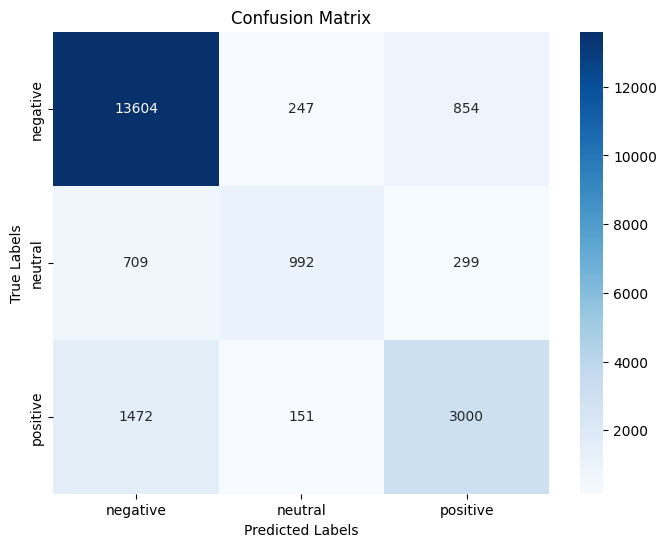

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred_probs = model.predict(test_encodings['input_ids']).logits
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print overall performance metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = tf.math.confusion_matrix(y_test, y_pred).numpy()
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import RobertaTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'hmpv_df' is a pandas DataFrame with 'processed_text_hmpv' and 'hmpv_sentiment' columns

# Encode sentiment labels
le = LabelEncoder()
mpox_df['mpox_sentiment_encoded'] = le.fit_transform(mpox_df['mpox_sentiment'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    mpox_df['processed_text_mpox'],
    mpox_df['mpox_sentiment_encoded'],
    test_size=0.2,
    random_state=42
)

# Initialize Roberta tokenizer
tokenizer = RobertaTokenizer.from_pretrained('distilroberta-base')

# Tokenization function
def tokenize(text_series, max_length=128):
    return tokenizer(
        list(text_series),
        padding=True,
        truncation=True,
        return_tensors='tf',
        max_length=max_length
    )

# Tokenize text
train_encodings = tokenize(X_train)
test_encodings = tokenize(X_test)

# Convert labels to tensors
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(y_test)

# Initialize DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained(
    'distilroberta-base',
    num_labels=len(le.classes_)
)

# Learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=3e-5,
    decay_steps=1000,
    decay_rate=0.9
)

# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_encodings['input_ids'],
    y_train_tensor,
    validation_data=(test_encodings['input_ids'], y_test_tensor),
    epochs=4,
    batch_size=8
)

# Evaluate accuracy
loss, accuracy = model.evaluate(test_encodings['input_ids'], y_test_tensor)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Predict
y_pred_logits = model.predict(test_encodings['input_ids']).logits
y_pred = tf.argmax(y_pred_logits, axis=1).numpy()
y_true = y_test_tensor.numpy()

# Precision, Recall, F1
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Save model and tokenizer
model.save_pretrained('./distilroberta_sentiment_model')
tokenizer.save_pretrained('./distilroberta_sentiment_model')

print("Model and tokenizer saved!")


You are using a model of type roberta to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['roberta.encoder.layer.3.attention.self.query.weight', 'roberta.encoder.layer.3.attention.output.LayerNorm.bias', 'roberta.encoder.layer.1.attention.self.query.weight', 'roberta.encoder.layer.1.intermediate.dense.bias', 'roberta.encoder.layer.1.intermediate.dense.weight', 'roberta.encoder.layer.4.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.output.dense.bias', 'roberta.encoder.layer.5.output.LayerNorm.weight', 'roberta.encoder.layer.3.attention.self.value.weight', 'roberta.encoder.layer.2.output.dense.weight', 'roberta.encoder.layer.0.output.LayerNorm.weight', 'roberta.encoder.layer.4.attention.output.LayerNorm.bias', 'roberta.encoder.layer.1.attention.output.dense.weight', 'roberta.encoder.lay

Epoch 1/4
10664/10664 [==============================] - 1410s 130ms/step - loss: 0.6044 - accuracy: 0.7548 - val_loss: 0.4778 - val_accuracy: 0.8043
Epoch 2/4
10664/10664 [==============================] - 1380s 129ms/step - loss: 0.4039 - accuracy: 0.8351 - val_loss: 0.4459 - val_accuracy: 0.8215
Epoch 3/4
 9924/10664 [==========================>...] - ETA: 1:29 - loss: 0.3401 - accuracy: 0.8625